<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.795623,79.676967,0.000020,148.472610,148.472528,0.000083
1,0.0,1.0,98.630828,50.598018,0.000340,159.229186,159.228960,0.000226
2,0.0,2.0,97.238784,60.873271,-0.000346,168.111709,168.112125,-0.000416
3,0.0,3.0,93.270619,55.074271,-0.000116,158.344775,158.344978,-0.000203
4,0.0,4.0,52.992691,56.318683,-0.000166,119.311208,119.311397,-0.000188
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,61.253157,56.438129,0.000284,127.691571,127.691348,0.000223
59996,999.0,56.0,57.689978,55.593625,-0.000523,123.283081,123.283660,-0.000580
59997,999.0,57.0,62.061678,93.590459,-0.000089,165.652047,165.652080,-0.000033
59998,999.0,58.0,81.505564,40.094288,-0.000542,131.599310,131.600011,-0.000701


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.795623  79.676967  0.000020  148.472610  148.472528  0.000083
      1.0    98.630828  50.598018  0.000340  159.229186  159.228960  0.000226
      2.0    97.238784  60.873271 -0.000346  168.111709  168.112125 -0.000416
      3.0    93.270619  55.074271 -0.000116  158.344775  158.344978 -0.000203
      4.0    52.992691  56.318683 -0.000166  119.311208  119.311397 -0.000188
...                ...        ...       ...         ...         ...       ...
999.0 55.0   61.253157  56.438129  0.000284  127.691571  127.691348  0.000223
      56.0   57.689978  55.593625 -0.000523  123.283081  123.283660 -0.000580
      57.0   62.061678  93.590459 -0.000089  165.652047  165.652080 -0.000033
      58.0   81.505564  40.094288 -0.000542  131.599310  131.600011 -0.000701
      59.0   66.363070  66.215735  0.000307  142.579112  142.578846  0.000266

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.795623  79.676967  0.000020  148.472610  148.472528  0.000083
      1.0    98.630828  50.598018  0.000340  159.229186  159.228960  0.000226
      2.0    97.238784  60.873271 -0.000346  168.111709  168.112125 -0.000416
      3.0    93.270619  55.074271 -0.000116  158.344775  158.344978 -0.000203
      4.0    52.992691  56.318683 -0.000166  119.311208  119.311397 -0.000188
...                ...        ...       ...         ...         ...       ...
999.0 55.0   61.253157  56.438129  0.000284  127.691571  127.691348  0.000223
      56.0   57.689978  55.593625 -0.000523  123.283081  123.283660 -0.000580
      57.0   62.061678  93.590459 -0.000089  165.652047  165.652080 -0.000033
      58.0   81.505564  40.094288 -0.000542  131.599310  131.600011 -0.000701
      59.0   66.363070  66.215735  0.000307  142.579112  142.578846  0.000266

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.795623,79.676967,0.000020,148.472610,148.472528,0.000083
1,0.0,1.0,98.630828,50.598018,0.000340,159.229186,159.228960,0.000226
2,0.0,2.0,97.238784,60.873271,-0.000346,168.111709,168.112125,-0.000416
3,0.0,3.0,93.270619,55.074271,-0.000116,158.344775,158.344978,-0.000203
4,0.0,4.0,52.992691,56.318683,-0.000166,119.311208,119.311397,-0.000188
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,61.253157,56.438129,0.000284,127.691571,127.691348,0.000223
59996,999.0,56.0,57.689978,55.593625,-0.000523,123.283081,123.283660,-0.000580
59997,999.0,57.0,62.061678,93.590459,-0.000089,165.652047,165.652080,-0.000033
59998,999.0,58.0,81.505564,40.094288,-0.000542,131.599310,131.600011,-0.000701


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.795623  79.676967  0.000020  148.472610  148.472528  0.000083
      1.0    98.630828  50.598018  0.000340  159.229186  159.228960  0.000226
      2.0    97.238784  60.873271 -0.000346  168.111709  168.112125 -0.000416
      3.0    93.270619  55.074271 -0.000116  158.344775  158.344978 -0.000203
      4.0    52.992691  56.318683 -0.000166  119.311208  119.311397 -0.000188
...                ...        ...       ...         ...         ...       ...
999.0 55.0   61.253157  56.438129  0.000284  127.691571  127.691348  0.000223
      56.0   57.689978  55.593625 -0.000523  123.283081  123.283660 -0.000580
      57.0   62.061678  93.590459 -0.000089  165.652047  165.652080 -0.000033
      58.0   81.505564  40.094288 -0.000542  131.599310  131.600011 -0.000701
      59.0   66.363070  66.215735  0.000307  142.579112  142.578846  0.000266

[60000 rows x 6 columns]

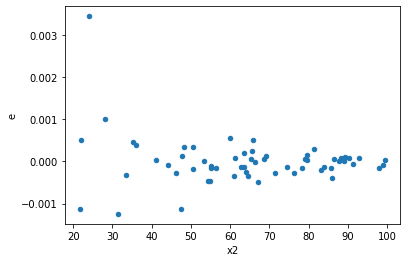

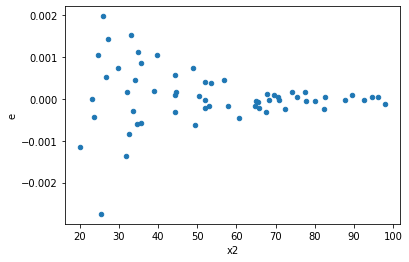

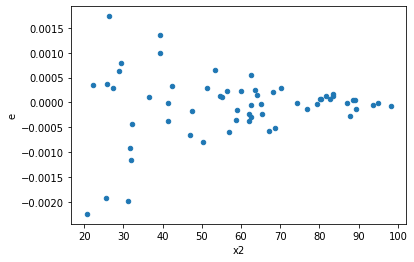

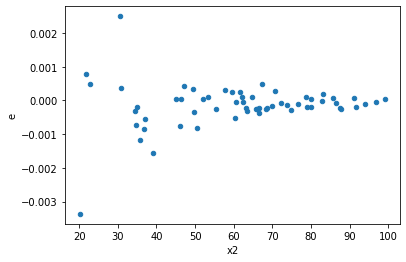

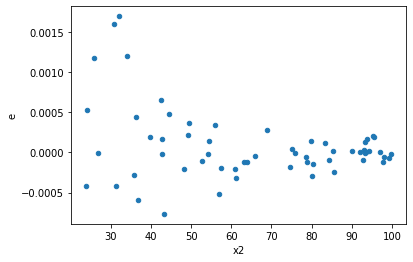

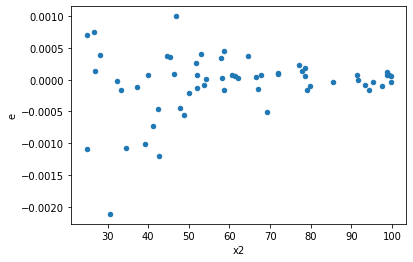

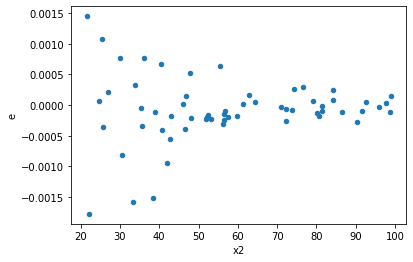

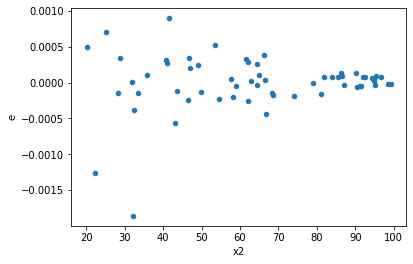

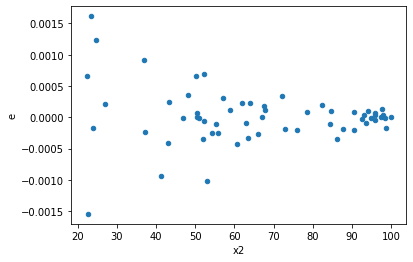

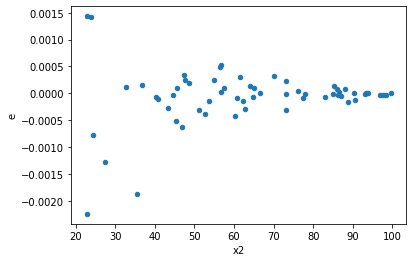

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,35.0,21.0,4.8396128520407286e-06,1.3925159434588895e-05,1.3827465291544938e-07,6.631028302185188e-07,4.795548686887577,0.0003569854330627287,0.9998215072834686,0.00017849271653136434,Reject001=0 : Heteroscedasticity
1.0,33.0,23.0,2.0798395215712687e-06,2.4303352735005163e-05,6.30254400476142e-08,1.0566675102176158e-06,16.765729988070355,1.4058505470870841e-09,0.9999999992970747,7.029252735435421e-10,Reject001=0 : Heteroscedasticity
4.0,18.0,38.0,4.500946433851187e-07,8.366415528909472e-06,2.500525796583993e-08,2.20168829708144e-07,8.804901353504134,2.4332345249789e-08,0.9999999878338274,1.21661726248945e-08,Reject001=0 : Heteroscedasticity
5.0,33.0,23.0,2.3868110857263926e-06,1.0035810586587354e-05,7.232760865837554e-08,4.363395907211893e-07,6.032822027645748,3.099111786597497e-05,0.999984504441067,1.5495558932987485e-05,Reject001=0 : Heteroscedasticity
7.0,27.0,29.0,1.5877256878283734e-06,6.402315467459514e-06,5.880465510475457e-08,2.2076949887791428e-07,3.7542860932461153,0.0007215443931791743,0.9996392278034104,0.00036077219658958715,Reject001=0 : Heteroscedasticity
11.0,34.0,22.0,2.0943085433834804e-06,1.879306644681379e-05,6.159731009951413e-08,8.542302930369906e-07,13.867980463058053,1.8509005439426574e-08,0.9999999907454973,9.254502719713287e-09,Reject001=0 : Heteroscedasticity
14.0,34.0,22.0,8.87558934714984e-06,1.0075182864854907e-05,2.6104674550440703e-07,4.579628574934049e-07,1.7543327598607181,0.16905160555077625,0.9154741972246119,0.08452580277538813,Reject001=1 : Homoscedasticity
20.0,18.0,38.0,3.7925431766842456e-07,2.0982058042769426e-05,2.1069684314912475e-08,5.521594221781428e-07,26.206345283841838,8.881784197001252e-16,0.9999999999999996,4.440892098500626e-16,Reject001=0 : Heteroscedasticity
22.0,34.0,22.0,6.115688769999374e-06,1.2458560230063686e-05,1.7987319911762865e-07,5.662981922756221e-07,3.148318899389172,0.006280423248841149,0.9968597883755794,0.0031402116244205747,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,35.0,21.0,4.8396128520407286e-06,1.3925159434588895e-05,1.3827465291544938e-07,6.631028302185188e-07,4.795548686887577,0.0003569854330627287,Reject001=0 : Heteroscedasticity
1.0,33.0,23.0,2.0798395215712687e-06,2.4303352735005163e-05,6.30254400476142e-08,1.0566675102176158e-06,16.765729988070355,1.4058505470870841e-09,Reject001=0 : Heteroscedasticity
2.0,28.0,28.0,1.9164478900114655e-05,5.441138363220421e-06,6.844456750040948e-07,1.94326370115015e-07,0.28391788744059554,0.0013637431190566655,Reject001=0 : Heteroscedasticity
3.0,33.0,23.0,2.4022109939849035e-05,1.04156873013483e-06,7.279427254499707e-07,4.5285596962383915e-08,0.062210384662325,1.0882233206397344e-11,Reject001=0 : Heteroscedasticity
4.0,18.0,38.0,4.500946433851187e-07,8.366415528909472e-06,2.500525796583993e-08,2.20168829708144e-07,8.804901353504134,2.4332345249789e-08,Reject001=0 : Heteroscedasticity
5.0,33.0,23.0,2.3868110857263926e-06,1.0035810586587354e-05,7.232760865837554e-08,4.363395907211893e-07,6.032822027645748,3.099111786597497e-05,Reject001=0 : Heteroscedasticity
6.0,23.0,33.0,1.0936722454091266e-05,3.490882269556264e-06,4.7550967191701155e-07,1.0578431119867467e-07,0.22246510943133183,0.0003772285487172313,Reject001=0 : Heteroscedasticity
7.0,27.0,29.0,1.5877256878283734e-06,6.402315467459514e-06,5.880465510475457e-08,2.2076949887791428e-07,3.7542860932461153,0.0007215443931791743,Reject001=0 : Heteroscedasticity
8.0,22.0,34.0,1.0594077786634104e-05,1.0124694857054715e-06,4.815489903015502e-07,2.9778514285455045e-08,0.06183901302919871,4.018688995088604e-09,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    893
Reject001=1 : Homoscedasticity      107
Name: Result_test, dtype: int64